Epoch 1/20, Train Loss: 0.3181, Val Acc: 88.33%
Epoch 2/20, Train Loss: 0.2079, Val Acc: 88.72%
Epoch 3/20, Train Loss: 0.1986, Val Acc: 89.61%
Epoch 4/20, Train Loss: 0.1908, Val Acc: 89.86%
Epoch 5/20, Train Loss: 0.1850, Val Acc: 89.16%
Epoch 6/20, Train Loss: 0.1808, Val Acc: 89.73%
Epoch 7/20, Train Loss: 0.1776, Val Acc: 89.53%
Epoch 8/20, Train Loss: 0.1745, Val Acc: 90.24%
Epoch 9/20, Train Loss: 0.1738, Val Acc: 90.20%
Epoch 10/20, Train Loss: 0.1717, Val Acc: 90.27%
Epoch 11/20, Train Loss: 0.1706, Val Acc: 89.30%
Epoch 12/20, Train Loss: 0.1698, Val Acc: 89.88%
Epoch 13/20, Train Loss: 0.1686, Val Acc: 90.39%
Epoch 14/20, Train Loss: 0.1684, Val Acc: 90.42%
Epoch 15/20, Train Loss: 0.1677, Val Acc: 89.04%
Epoch 16/20, Train Loss: 0.1674, Val Acc: 89.72%
Epoch 17/20, Train Loss: 0.1667, Val Acc: 88.91%
Epoch 18/20, Train Loss: 0.1659, Val Acc: 89.93%
Epoch 19/20, Train Loss: 0.1656, Val Acc: 90.38%
Epoch 20/20, Train Loss: 0.1648, Val Acc: 90.27%


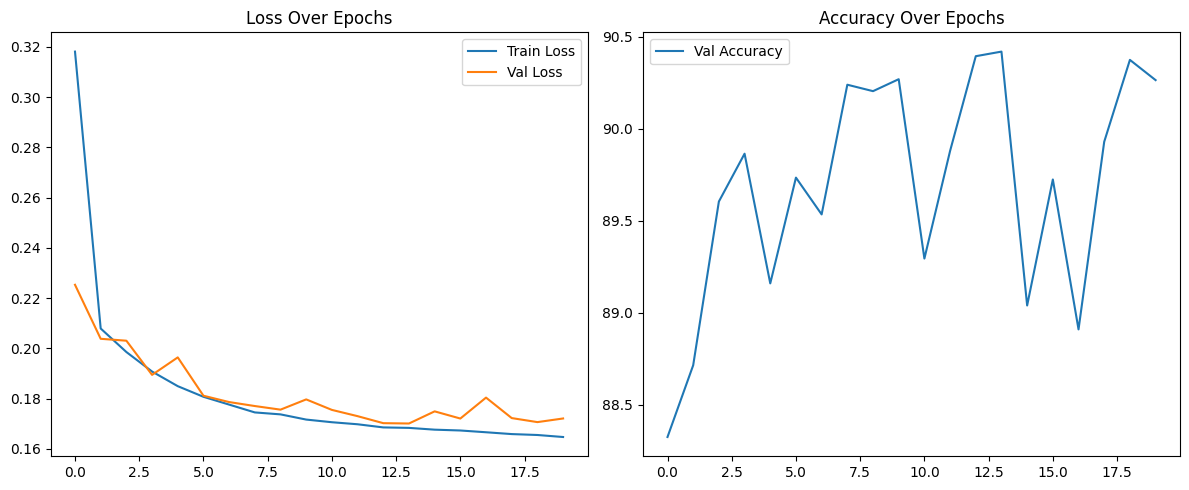

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Load dataset
df = pd.read_csv("Plant_Parameters.csv")  # Replace with actual filename

# 2. Features and labels
features = df.drop(columns=["Plant Type"])
labels = df["Plant Type"]

# 3. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 4. Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# 5. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 6. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# 7. Simple neural net
class SoilHealthNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoilHealthNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.model(x)

model = SoilHealthNN(input_dim=X_train.shape[1], output_dim=len(le.classes_))

# 8. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 9. Training loop
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_losses.append(total_loss / len(train_loader))

        # Validation
        model.eval()
        correct, total, val_loss = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y_batch).sum().item()
                total += y_batch.size(0)

        val_losses.append(val_loss / len(val_loader))
        accuracy = 100 * correct / total
        val_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Acc: {accuracy:.2f}%")

    return train_losses, val_losses, val_accuracies

# 10. Train
train_losses, val_losses, val_accuracies = train_model(model, criterion, optimizer, train_loader, val_loader)

# 11. Save the model
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
torch.save(model.state_dict(), f"soil_model_{timestamp}.pth")

# 12. Plot metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.tight_layout()
plt.savefig('soil_training_results.png')


Epoch 1/20, Train Loss: 0.3165, Val Acc: 89.22%
Epoch 2/20, Train Loss: 0.2062, Val Acc: 88.16%
Epoch 3/20, Train Loss: 0.1978, Val Acc: 89.40%
Epoch 4/20, Train Loss: 0.1896, Val Acc: 89.97%
Epoch 5/20, Train Loss: 0.1833, Val Acc: 89.74%
Epoch 6/20, Train Loss: 0.1792, Val Acc: 89.58%
Epoch 7/20, Train Loss: 0.1765, Val Acc: 89.51%
Epoch 8/20, Train Loss: 0.1746, Val Acc: 88.01%
Epoch 9/20, Train Loss: 0.1727, Val Acc: 89.73%
Epoch 10/20, Train Loss: 0.1711, Val Acc: 89.34%
Epoch 11/20, Train Loss: 0.1694, Val Acc: 90.38%
Epoch 12/20, Train Loss: 0.1680, Val Acc: 90.18%
Epoch 13/20, Train Loss: 0.1673, Val Acc: 89.67%
Epoch 14/20, Train Loss: 0.1667, Val Acc: 90.53%
Epoch 15/20, Train Loss: 0.1664, Val Acc: 89.98%
Epoch 16/20, Train Loss: 0.1651, Val Acc: 90.29%
Epoch 17/20, Train Loss: 0.1646, Val Acc: 89.67%
Epoch 18/20, Train Loss: 0.1638, Val Acc: 89.34%
Epoch 19/20, Train Loss: 0.1630, Val Acc: 90.39%
Epoch 20/20, Train Loss: 0.1626, Val Acc: 90.28%

🌾 Crop Selected: Carrots
📋 S

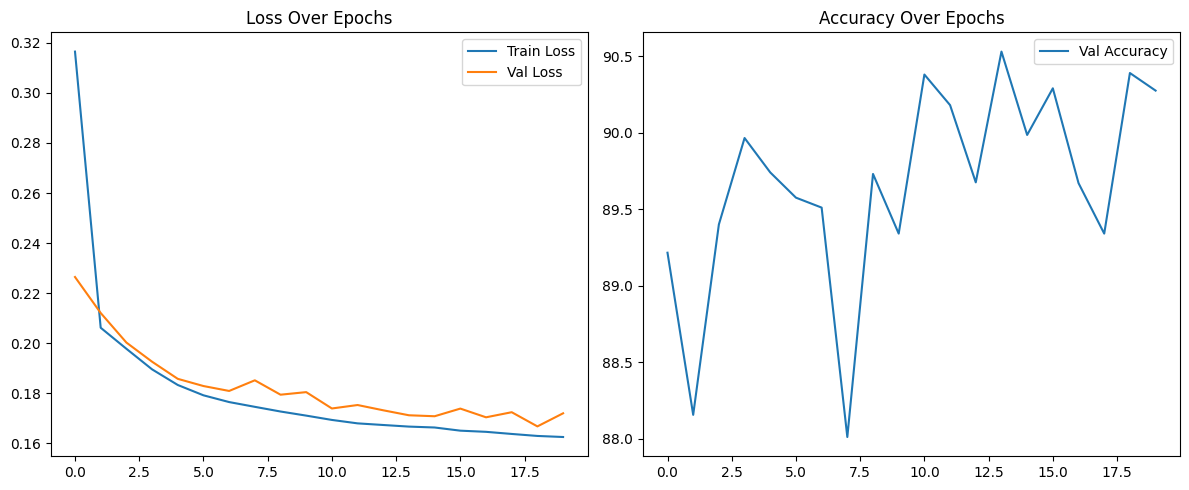

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from datetime import datetime

# === 1. Load and prepare data ===
df = pd.read_csv("Plant_Parameters.csv")  # Replace with actual filename

features = df.drop(columns=["Plant Type"])
labels = df["Plant Type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

le = LabelEncoder()
y_encoded = le.fit_transform(labels)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# === 2. Learn dynamic thresholds for each crop ===
def learn_thresholds(df):
    crop_thresholds = {}
    grouped = df.groupby("Plant Type")
    for crop, group in grouped:
        stats = {}
        for col in group.columns:
            if col != "Plant Type":
                mean = group[col].mean()
                std = group[col].std()
                stats[col] = (mean - std, mean + std)  # Range = mean ± 1 std dev
        crop_thresholds[crop] = stats
    return crop_thresholds

crop_thresholds = learn_thresholds(df)
feature_columns = features.columns.tolist()

# === 3. Define model ===
class SoilHealthNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoilHealthNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.model(x)

model = SoilHealthNN(input_dim=X_train.shape[1], output_dim=len(le.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === 4. Train model ===
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))

        # Validation
        model.eval()
        correct, total, val_loss = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y_batch).sum().item()
                total += y_batch.size(0)
        val_losses.append(val_loss / len(val_loader))
        accuracy = 100 * correct / total
        val_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Acc: {accuracy:.2f}%")

    return train_losses, val_losses, val_accuracies

train_losses, val_losses, val_accuracies = train_model(model, criterion, optimizer, train_loader, val_loader)

# === 5. Plot and save model ===
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
torch.save(model.state_dict(), f"soil_model_{timestamp}.pth")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.tight_layout()
plt.savefig('soil_training_results.png')

# === 6. Generate Real-Time Recommendations ===
def generate_recommendations(crop, input_features, thresholds, columns):
    messages = []
    for i, feature in enumerate(columns):
        value = input_features[i]
        low, high = thresholds[crop][feature]
        if value < low:
            messages.append(f"{feature}: Too Low — Suggest Increase")
        elif value > high:
            messages.append(f"{feature}: Too High — Suggest Decrease")
        else:
            messages.append(f"{feature}: OK")
    return messages

# === 7. Example Inference (manual or from sensor) ===
realtime_sample = [6.2, 0.3, 13, 120, 50, 16, 23, 72, 55]  # Simulated sensor input
target_crop = "Carrots"

# Use recommendation engine
recommendations = generate_recommendations(target_crop, realtime_sample, crop_thresholds, feature_columns)

print(f"\n🌾 Crop Selected: {target_crop}")
print("📋 Soil Health Recommendations:")
for rec in recommendations:
    print(" -", rec)
